# Future Stock prices

In this notebook, you’ll find the steps that have been taken to create our future prediction model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
start = dt.datetime(2016,1,1)
end = dt.datetime.today()
    
data_goog = yf.download('GOOG', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data_goog

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,37.150002,37.202999,36.562901,37.091999,37.049839,65456000
2016-01-05,37.322498,37.599998,36.931999,37.129002,37.086800,39014000
2016-01-06,36.500000,37.359001,36.445999,37.181000,37.138737,38940000
2016-01-07,36.515499,36.924999,35.952999,36.319500,36.278217,59274000
2016-01-08,36.572498,36.661499,35.650002,35.723499,35.682896,49018000
...,...,...,...,...,...,...
2024-08-22,169.039993,169.419998,165.029999,165.490005,165.490005,19123800
2024-08-23,166.550003,167.949997,165.660004,167.429993,167.429993,14281600
2024-08-26,168.154999,169.380005,166.320007,167.929993,167.929993,11990300


In [4]:
data_goog.reset_index(inplace=True)

In [5]:
data_goog['Date']

0      2016-01-04
1      2016-01-05
2      2016-01-06
3      2016-01-07
4      2016-01-08
          ...    
2173   2024-08-22
2174   2024-08-23
2175   2024-08-26
2176   2024-08-27
2177   2024-08-28
Name: Date, Length: 2178, dtype: datetime64[ns]

In [6]:
df = data_goog
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,37.150002,37.202999,36.562901,37.091999,65456000
1,37.322498,37.599998,36.931999,37.129002,39014000
2,36.500000,37.359001,36.445999,37.181000,38940000
3,36.515499,36.924999,35.952999,36.319500,59274000
4,36.572498,36.661499,35.650002,35.723499,49018000


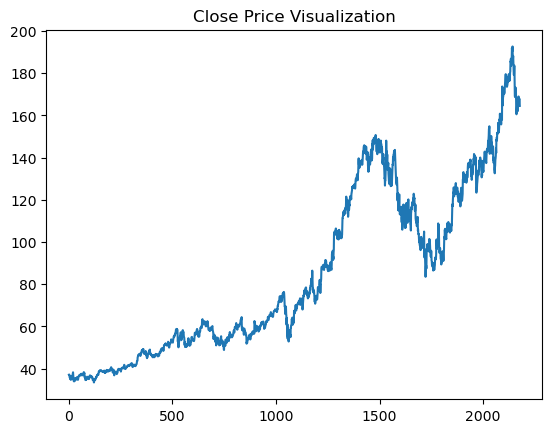

In [7]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [8]:
ma100 = df['Close'].rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2173    172.1047
2174    172.2203
2175    172.3359
2176    172.4803
2177    172.5859
Name: Close, Length: 2178, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

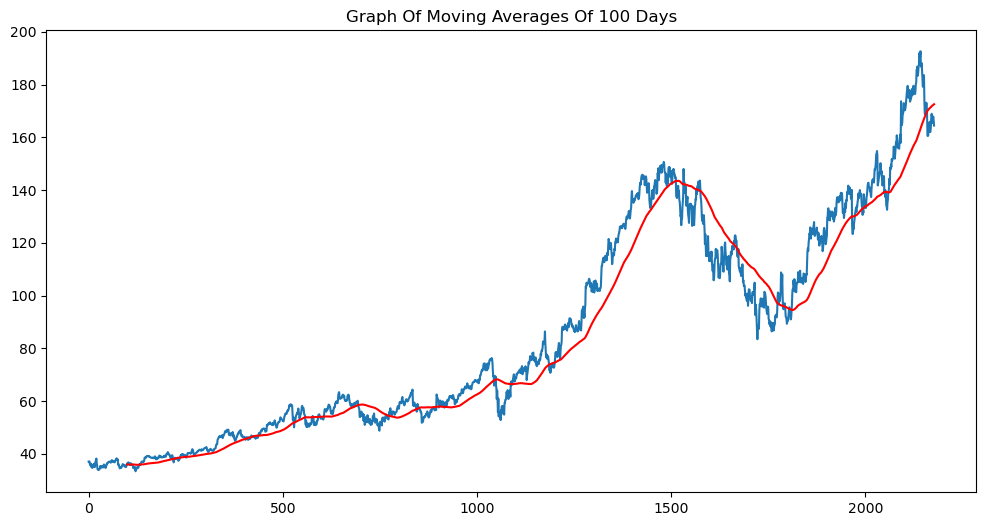

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

In [10]:
ma200 = df['Close'].rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2173    156.77885
2174    156.95875
2175    157.13640
2176    157.30200
2177    157.46605
Name: Close, Length: 2178, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days and 200 days')

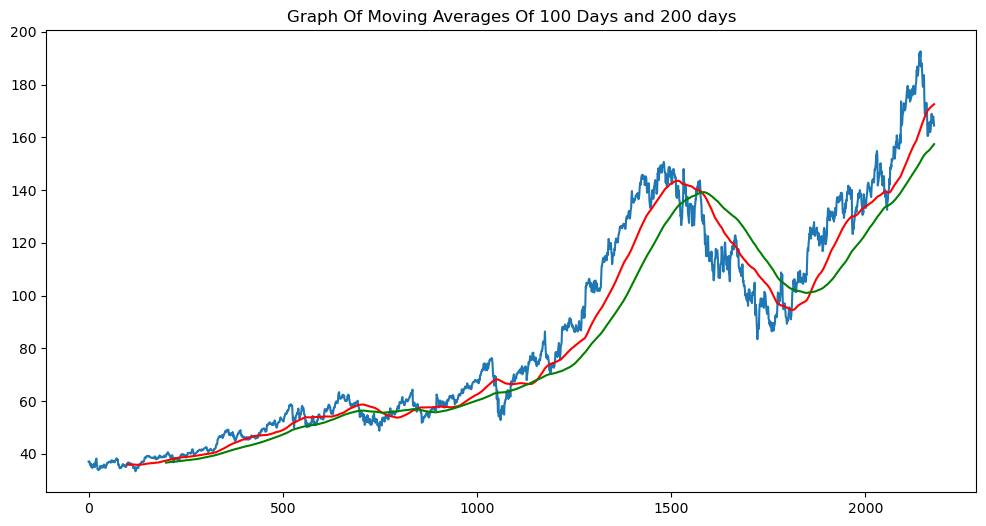

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Graph Of Moving Averages Of 100 Days and 200 days')

In [12]:
ma50 = df['Close'].rolling(50).mean()
ma50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2173    176.410600
2174    176.168000
2175    175.991799
2176    175.752000
2177    175.466400
Name: Close, Length: 2178, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 50 Days')

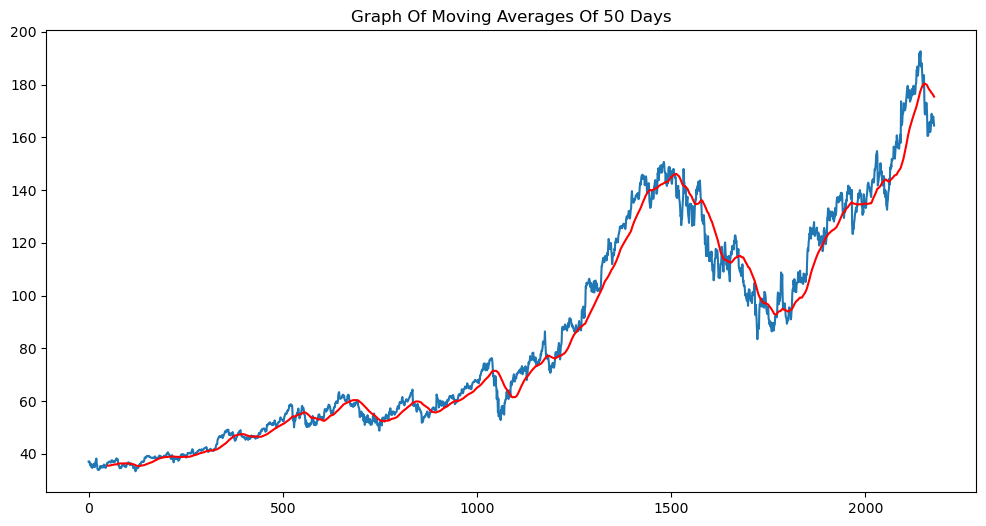

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma50, 'r')
plt.title('Graph Of Moving Averages Of 50 Days')

In [14]:
train = pd.DataFrame(data_goog[0:int(len(data_goog)*0.70)])
test = pd.DataFrame(data_goog[int(len(data_goog)*0.70): int(len(data_goog))])

print(train.shape)
print(test.shape)

(1524, 7)
(654, 7)


In [15]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,37.150002,37.202999,36.562901,37.091999,37.049839,65456000
1,2016-01-05,37.322498,37.599998,36.931999,37.129002,37.086800,39014000
2,2016-01-06,36.500000,37.359001,36.445999,37.181000,37.138737,38940000
3,2016-01-07,36.515499,36.924999,35.952999,36.319500,36.278217,59274000
4,2016-01-08,36.572498,36.661499,35.650002,35.723499,35.682896,49018000


In [16]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1524,2022-01-21,133.011993,134.760498,130.001007,130.091995,129.944122,41920000
1525,2022-01-24,126.027496,130.778503,124.641953,130.371994,130.223801,55148000
1526,2022-01-25,128.435501,129.338501,126.377998,126.735497,126.591438,36008000
1527,2022-01-26,130.592499,132.807495,127.153503,129.240005,129.093109,39630000
1528,2022-01-27,131.360992,132.609955,128.945007,129.121002,128.974228,30248000


In [17]:
train.loc[3]['Open']

36.515499114990234

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))

train_close = train[['Date', 'Close']]
test_close = test[['Date', 'Close']]

train_close['Close'] = scaler.fit_transform(train_close[['Close']])
test_close['Close'] = scaler.transform(test_close[['Close']])

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_16256\290930687.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Close'] = scaler.fit_transform(train_close[['Close']])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_16256\290930687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Close'] = scaler.transform(test_close[['Close']])


In [19]:
train_close['Date'] = pd.to_datetime(train_close['Date'])
test_close['Date'] = pd.to_datetime(test_close['Date'])

C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_16256\801203695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_close['Date'] = pd.to_datetime(train_close['Date'])
C:\Users\Mohamed Aziz\AppData\Local\Temp\ipykernel_16256\801203695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_close['Date'] = pd.to_datetime(test_close['Date'])


In [20]:
x_train = []
y_train = []
for i in range(50, len(train_close)):
    x_train.append(train_close[['Close']].iloc[i-50:i].values)
    y_train.append(train_close['Close'].iloc[i])

x_train, y_train = np.array(x_train), np.array(y_train)

# Preparing the testing data
x_test = []
y_test = []
test_dates = []

for i in range(50, len(test_close)):
    x_test.append(test_close[['Close']].iloc[i-50:i].values)
    y_test.append(test_close['Close'].iloc[i])
    test_dates.append(test_close['Date'].iloc[i])

x_test, y_test = np.array(x_test), np.array(y_test)

In [21]:
x_train.shape

(1474, 50, 1)

In [22]:
x_test.shape

(604, 50, 1)

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 50, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 50, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 200)


Epoch 1/200


47/47 [==============================] - 7s 69ms/step - loss: 0.0319 - MAE: 0.1152 - val_loss: 0.0099 - val_MAE: 0.0759
Epoch 2/200
47/47 [==============================] - 2s 52ms/step - loss: 0.0067 - MAE: 0.0544 - val_loss: 0.0053 - val_MAE: 0.0577
Epoch 3/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0059 - MAE: 0.0519 - val_loss: 0.0055 - val_MAE: 0.0619
Epoch 4/200
47/47 [==============================] - 3s 53ms/step - loss: 0.0048 - MAE: 0.0451 - val_loss: 0.0053 - val_MAE: 0.0601
Epoch 5/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0045 - MAE: 0.0450 - val_loss: 0.0334 - val_MAE: 0.1647
Epoch 6/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0082 - MAE: 0.0618 - val_loss: 0.0047 - val_MAE: 0.0555
Epoch 7/200
47/47 [==============================] - 3s 55ms/step - loss: 0.0049 - MAE: 0.0451 - val_loss: 0.0135 - val_MAE: 0.0954
Epoch 8/200
47/47 [==============================] - 3s 55ms/step - loss:

47/47 [==============================] - 3s 53ms/step - loss: 0.0030 - MAE: 0.0373 - val_loss: 0.0075 - val_MAE: 0.0630
Epoch 59/200
47/47 [==============================] - 2s 52ms/step - loss: 0.0027 - MAE: 0.0354 - val_loss: 0.0085 - val_MAE: 0.0676
Epoch 60/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0025 - MAE: 0.0337 - val_loss: 0.0088 - val_MAE: 0.0679
Epoch 61/200
47/47 [==============================] - 2s 51ms/step - loss: 0.0025 - MAE: 0.0333 - val_loss: 0.0094 - val_MAE: 0.0691
Epoch 62/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0024 - MAE: 0.0329 - val_loss: 0.0079 - val_MAE: 0.0637
Epoch 63/200
47/47 [==============================] - 3s 53ms/step - loss: 0.0022 - MAE: 0.0322 - val_loss: 0.0086 - val_MAE: 0.0700
Epoch 64/200
47/47 [==============================] - 2s 51ms/step - loss: 0.0025 - MAE: 0.0339 - val_loss: 0.0079 - val_MAE: 0.0637
Epoch 65/200
47/47 [==============================] - 2s 51ms/step - loss: 0.0024 

47/47 [==============================] - 2s 53ms/step - loss: 0.0022 - MAE: 0.0319 - val_loss: 0.0161 - val_MAE: 0.0830
Epoch 120/200
47/47 [==============================] - 3s 53ms/step - loss: 0.0021 - MAE: 0.0313 - val_loss: 0.0154 - val_MAE: 0.0850
Epoch 121/200
47/47 [==============================] - 3s 54ms/step - loss: 0.0023 - MAE: 0.0324 - val_loss: 0.0114 - val_MAE: 0.0722
Epoch 122/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0024 - MAE: 0.0329 - val_loss: 0.0124 - val_MAE: 0.0729
Epoch 123/200
47/47 [==============================] - 3s 57ms/step - loss: 0.0022 - MAE: 0.0321 - val_loss: 0.0136 - val_MAE: 0.0816
Epoch 124/200
47/47 [==============================] - 3s 56ms/step - loss: 0.0022 - MAE: 0.0315 - val_loss: 0.0134 - val_MAE: 0.0739
Epoch 125/200
47/47 [==============================] - 3s 59ms/step - loss: 0.0023 - MAE: 0.0323 - val_loss: 0.0138 - val_MAE: 0.0807
Epoch 126/200
47/47 [==============================] - 3s 55ms/step - loss: 

47/47 [==============================] - 3s 55ms/step - loss: 0.0020 - MAE: 0.0294 - val_loss: 0.0307 - val_MAE: 0.0990
Epoch 181/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0019 - MAE: 0.0299 - val_loss: 0.1100 - val_MAE: 0.1397
Epoch 182/200
47/47 [==============================] - 3s 54ms/step - loss: 0.0021 - MAE: 0.0302 - val_loss: 0.0168 - val_MAE: 0.0837
Epoch 183/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0020 - MAE: 0.0302 - val_loss: 0.0197 - val_MAE: 0.0977
Epoch 184/200
47/47 [==============================] - 3s 54ms/step - loss: 0.0020 - MAE: 0.0303 - val_loss: 0.0298 - val_MAE: 0.1050
Epoch 185/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0024 - MAE: 0.0341 - val_loss: 0.0229 - val_MAE: 0.1017
Epoch 186/200
47/47 [==============================] - 2s 53ms/step - loss: 0.0020 - MAE: 0.0299 - val_loss: 0.0146 - val_MAE: 0.0785
Epoch 187/200
47/47 [==============================] - 2s 53ms/step - loss: 

In [26]:
model.save('keras_model.h5')

C:\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
test_close.shape
test_close

,Date,Close
1524,2022-01-21,0.824231
1525,2022-01-24,0.826618
1526,2022-01-25,0.795615
1527,2022-01-26,0.816967
1528,2022-01-27,0.815953
...,...,...
2173,2024-08-22,1.126015
2174,2024-08-23,1.142554
2175,2024-08-26,1.146817
2176,2024-08-27,1.133602


In [28]:
past_50_days = train_close[['Close']].iloc[-50:]

In [29]:
final_df = pd.concat([past_50_days, test_close[['Close']]], ignore_index=True)

In [30]:
final_df.head()

,Close
0,0.987549
1,0.965191
2,0.966231
3,0.990933
4,0.988738


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.60234958],
       [0.57832743],
       [0.5794449 ],
       [0.605986  ],
       [0.60362736],
       [0.60076947],
       [0.60064116],
       [0.61572775],
       [0.60879819],
       [0.58247234],
       [0.57952737],
       [0.5791655 ],
       [0.54333607],
       [0.57363742],
       [0.54009339],
       [0.53245393],
       [0.55222592],
       [0.54072082],
       [0.55240902],
       [0.59124757],
       [0.59751308],
       [0.59188423],
       [0.59709629],
       [0.57904641],
       [0.56316299],
       [0.58512868],
       [0.56195383],
       [0.54330853],
       [0.53963088],
       [0.55629297],
       [0.5812861 ],
       [0.58305854],
       [0.59149944],
       [0.57669687],
       [0.57721444],
       [0.57261611],
       [0.56049742],
       [0.56411553],
       [0.55808833],
       [0.49613907],
       [0.49520009],
       [0.4901942 ],
       [0.50457089],
       [0.51779336],
       [0.53272872],
       [0.50967295],
       [0.51567737],
       [0.483

In [32]:
input_data.shape

(704, 1)

In [33]:
x_test = []
y_test = []

for i in range(50, input_data.shape[0]):
    x_test.append(input_data[i-50: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(654, 50, 1)
(654,)


In [35]:
y_pred = model.predict(x_test)

21/21 [==============================] - 1s 15ms/step


In [36]:
y_pred.shape

(654, 1)

In [37]:
y_test

array([0.42687547, 0.42944026, 0.39612986, 0.41907122, 0.41798115,
       0.45616474, 0.47823121, 0.4982    , 0.59124757, 0.54191166,
       0.54525974, 0.50790513, 0.51042408, 0.53094258, 0.50483184,
       0.46386374, 0.47458095, 0.48489059, 0.49461851, 0.44717873,
       0.43031509, 0.42055964, 0.40391132, 0.45052205, 0.46743153,
       0.47083453, 0.46421177, 0.46955661, 0.46549417, 0.44547031,
       0.39364752, 0.40110381, 0.46144542, 0.45060004, 0.43038833,
       0.39618024, 0.42292303, 0.45983792, 0.46817343, 0.48833469,
       0.48537602, 0.52017491, 0.50392501, 0.52965096, 0.53157002,
       0.53549506, 0.54740312, 0.54185673, 0.5144225 , 0.52404503,
       0.55099845, 0.52737018, 0.49176508, 0.48525232, 0.46276905,
       0.42416867, 0.41114314, 0.42865252, 0.40087019, 0.40735549,
       0.43089682, 0.40996151, 0.37966016, 0.33089675, 0.36420262,
       0.32990746, 0.28882019, 0.32904185, 0.28832555, 0.30839057,
       0.31729872, 0.35801958, 0.30463038, 0.29467806, 0.27108

In [38]:
y_pred

array([[0.48734605],
       [0.4746888 ],
       [0.45848972],
       [0.4395363 ],
       [0.42092872],
       [0.4064473 ],
       [0.40185723],
       [0.40664938],
       [0.41908008],
       [0.4406743 ],
       [0.46487576],
       [0.48659623],
       [0.4996245 ],
       [0.50397056],
       [0.5031151 ],
       [0.49788415],
       [0.48719752],
       [0.47314894],
       [0.459647  ],
       [0.45105216],
       [0.44400325],
       [0.43615368],
       [0.4270543 ],
       [0.41661826],
       [0.41004056],
       [0.41048568],
       [0.4173929 ],
       [0.42759916],
       [0.4383924 ],
       [0.44719934],
       [0.45077696],
       [0.44594258],
       [0.43454346],
       [0.42279863],
       [0.41542205],
       [0.41141307],
       [0.40666455],
       [0.4024245 ],
       [0.40279636],
       [0.40864724],
       [0.41952646],
       [0.4326778 ],
       [0.44763255],
       [0.46115398],
       [0.4734274 ],
       [0.48382282],
       [0.49179655],
       [0.497

In [39]:
scaler.scale_

array([1.07443432])

In [40]:
scaler.scale_[0]

1.0744343244883283

In [41]:
scale_factor = 1/scaler.scale_[0]
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

In [42]:
y_pred.shape

(654, 1)

In [43]:
y_test.shape

(654,)

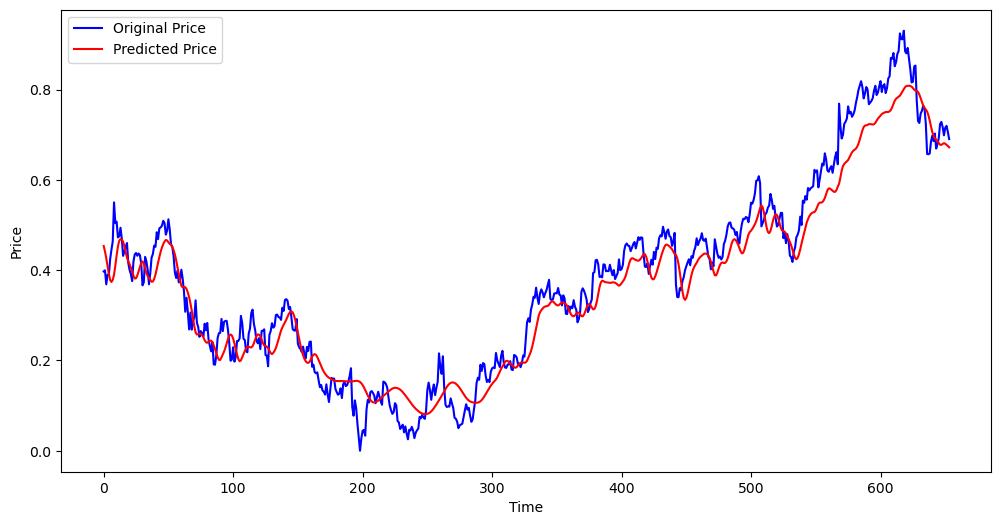

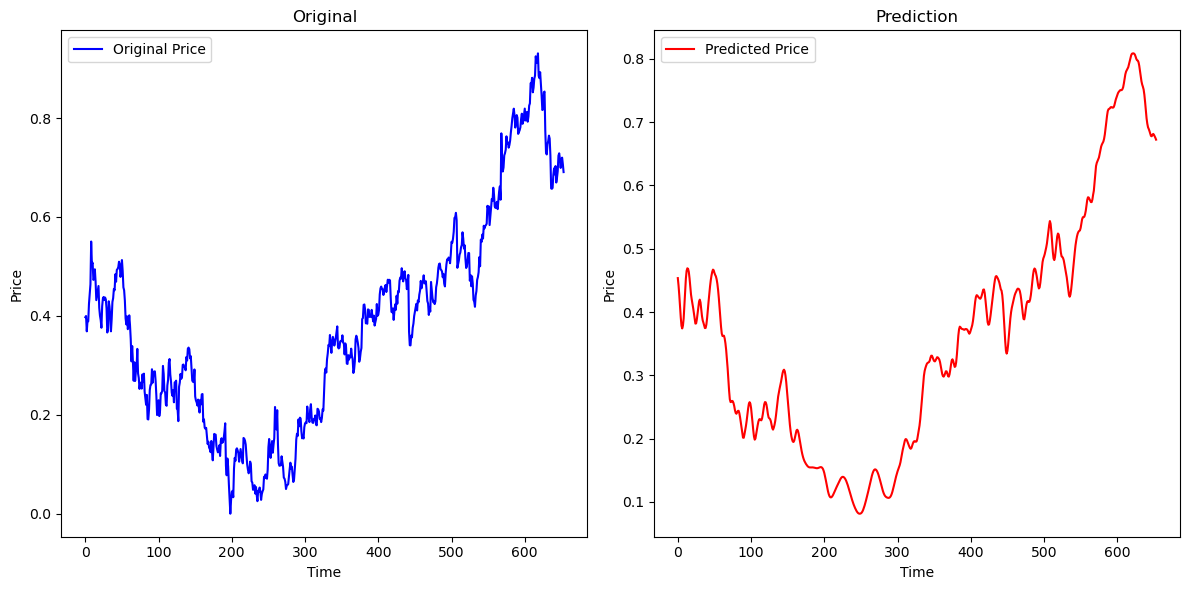

In [44]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(y_test, 'b', label = "Original Price")
ax1.set_title('Original')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.legend()

ax2.plot(y_pred, 'r', label = "Predicted Price")
ax2.set_title('Prediction')
ax2.set_xlabel('Time')
ax2.set_ylabel('Price')
ax2.legend()

plt.tight_layout()

plt.show()

In [45]:
data_goog.set_index('Date', inplace=True)
data = data_goog['Adj Close'].values.reshape(-1, 1)

In [46]:
data

array([[ 37.04983902],
       [ 37.08679962],
       [ 37.13873672],
       ...,
       [167.92999268],
       [166.38000488],
       [164.5       ]])

21/21 [==============================] - 0s 15ms/step


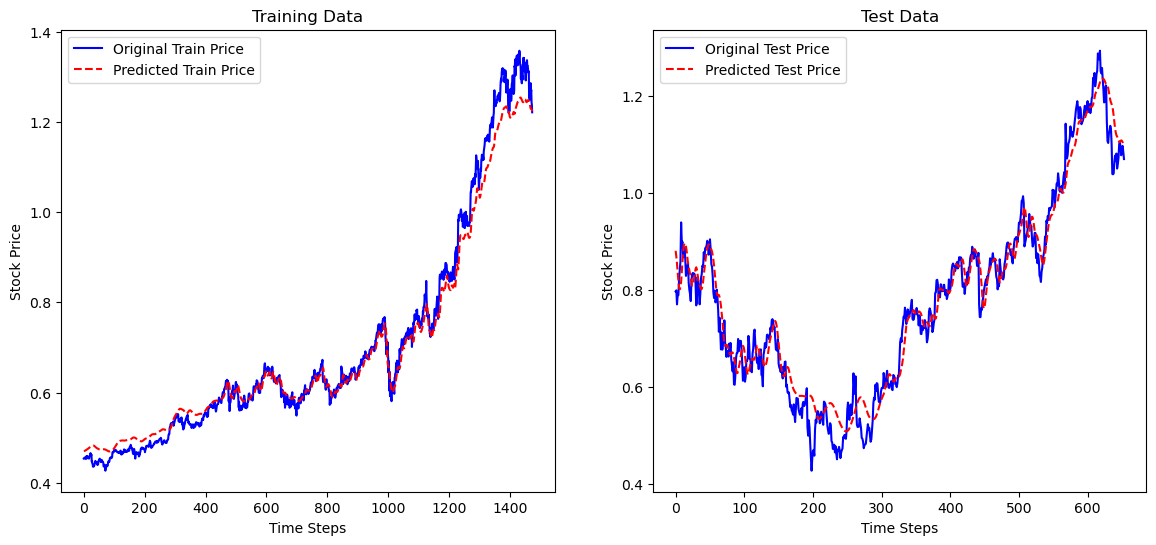

In [47]:
import matplotlib.pyplot as plt


train_predict = model.predict(x_train)
train_predict = scaler.inverse_transform(train_predict)


test_predict = model.predict(x_test)
test_predict = scaler.inverse_transform(test_predict)


y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(y_train_inv, color='blue', label='Original Train Price')
plt.plot(train_predict, color='red', linestyle='--', label='Predicted Train Price')
plt.title('Training Data')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(y_test_inv, color='blue', label='Original Test Price')
plt.plot(test_predict, color='red', linestyle='--', label='Predicted Test Price')
plt.title('Test Data')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()

plt.show()

In [48]:
input_data[-50:]

array([[0.85151593],
       [0.86305765],
       [0.8864156 ],
       [0.89127041],
       [0.93514701],
       [0.93322334],
       [0.94687183],
       [0.91536132],
       [0.92516261],
       [0.94458182],
       [0.95172663],
       [0.99358801],
       [0.98003107],
       [0.97966473],
       [1.        ],
       [0.95090226],
       [0.94613901],
       [0.95905468],
       [0.93441419],
       [0.90803327],
       [0.87688924],
       [0.87844643],
       [0.91472019],
       [0.91701019],
       [0.83246306],
       [0.78473941],
       [0.7803425 ],
       [0.80278467],
       [0.80947145],
       [0.82128782],
       [0.81487583],
       [0.7777777 ],
       [0.70669596],
       [0.7057799 ],
       [0.70770356],
       [0.73600801],
       [0.75020607],
       [0.73701562],
       [0.75515243],
       [0.71942838],
       [0.72987081],
       [0.74425211],
       [0.7777777 ],
       [0.78290743],
       [0.77072458],
       [0.75112213],
       [0.76889246],
       [0.773

In [49]:
y_test[-50:]

array([0.79252488, 0.80326701, 0.82500678, 0.82952525, 0.87036218,
       0.86857178, 0.88127474, 0.8519472 , 0.86106949, 0.87914338,
       0.88579321, 0.92475453, 0.91213679, 0.91179583, 0.93072231,
       0.88502595, 0.88059269, 0.89261359, 0.86968013, 0.84512682,
       0.81614038, 0.81758969, 0.85135049, 0.85348185, 0.77479195,
       0.73037448, 0.72628217, 0.7471696 , 0.75339314, 0.7643909 ,
       0.75842312, 0.72389506, 0.65773769, 0.6568851 , 0.6586755 ,
       0.68501908, 0.69823353, 0.68595688, 0.70283721, 0.66958805,
       0.67930705, 0.69269205, 0.72389506, 0.72866942, 0.71733057,
       0.69908613, 0.71562537, 0.71988809, 0.70667377, 0.6906459 ])

In [50]:
x_test

array([[[0.60234958],
        [0.57832743],
        [0.5794449 ],
        ...,
        [0.4836539 ],
        [0.47780519],
        [0.45815242]],

       [[0.57832743],
        [0.5794449 ],
        [0.605986  ],
        ...,
        [0.47780519],
        [0.45815242],
        [0.42687547]],

       [[0.5794449 ],
        [0.605986  ],
        [0.60362736],
        ...,
        [0.45815242],
        [0.42687547],
        [0.42944026]],

       ...,

       [[0.85417242],
        [0.86910316],
        [0.87285881],
        ...,
        [0.77072458],
        [0.75112213],
        [0.76889246]],

       [[0.86910316],
        [0.87285881],
        [0.85151593],
        ...,
        [0.75112213],
        [0.76889246],
        [0.77347248]],

       [[0.87285881],
        [0.85151593],
        [0.86305765],
        ...,
        [0.76889246],
        [0.77347248],
        [0.75927455]]])

1/1 [==============================] - 0s 25ms/step


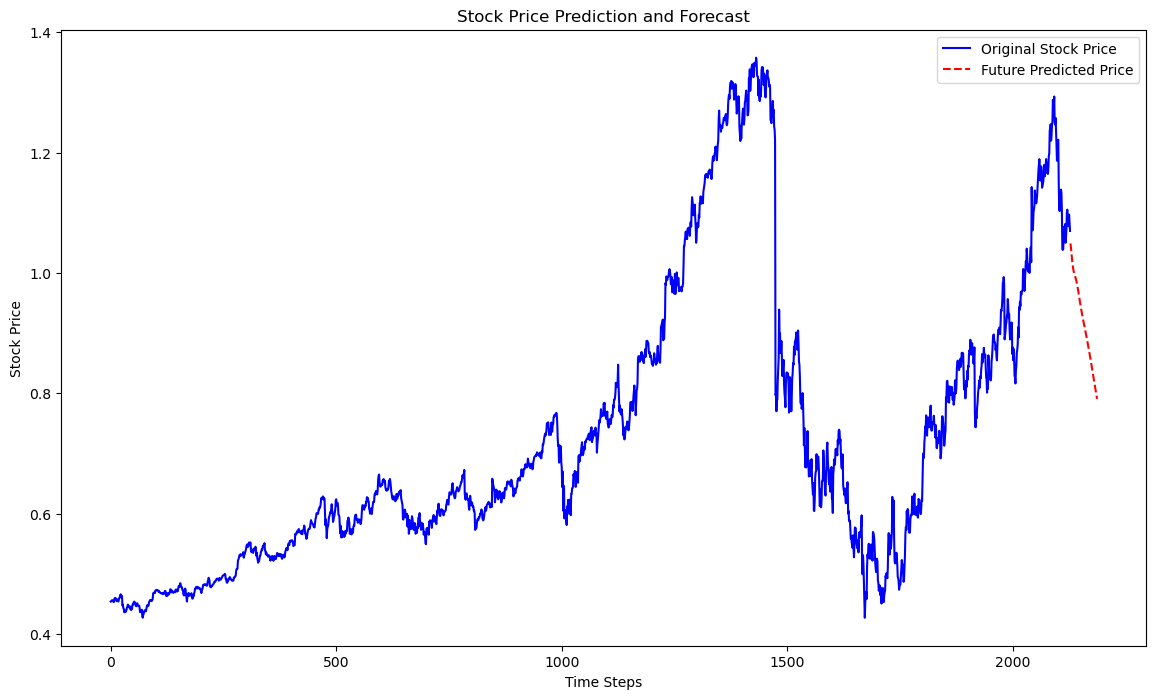

In [51]:
combined_actual_predicted = np.concatenate((y_train_inv, y_test_inv))
combined_predictions = np.concatenate((train_predict, test_predict))

last_sequence = y_test[-50:]

future_predictions = []
current_sequence = last_sequence

for _ in range(60): 
    current_sequence = current_sequence.reshape((1, 50, 1))
    next_pred = model.predict(current_sequence)
    future_predictions.append(next_pred[0, 0])
    next_pred = next_pred.reshape((1, 1, 1))
    current_sequence = np.append(current_sequence[:, 1:, :], next_pred, axis=1)

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

plt.figure(figsize=(14, 8))

plt.plot(combined_actual_predicted, color='blue', label='Original Stock Price')

#plt.plot(range(50, 50 + len(combined_predictions)), combined_predictions, color='orange', linestyle='--', label='Predicted Stock Price')

plt.plot(range(len(combined_actual_predicted), len(combined_actual_predicted) + len(future_predictions)), future_predictions, color='red', linestyle='--', label='Future Predicted Price')

plt.title('Stock Price Prediction and Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

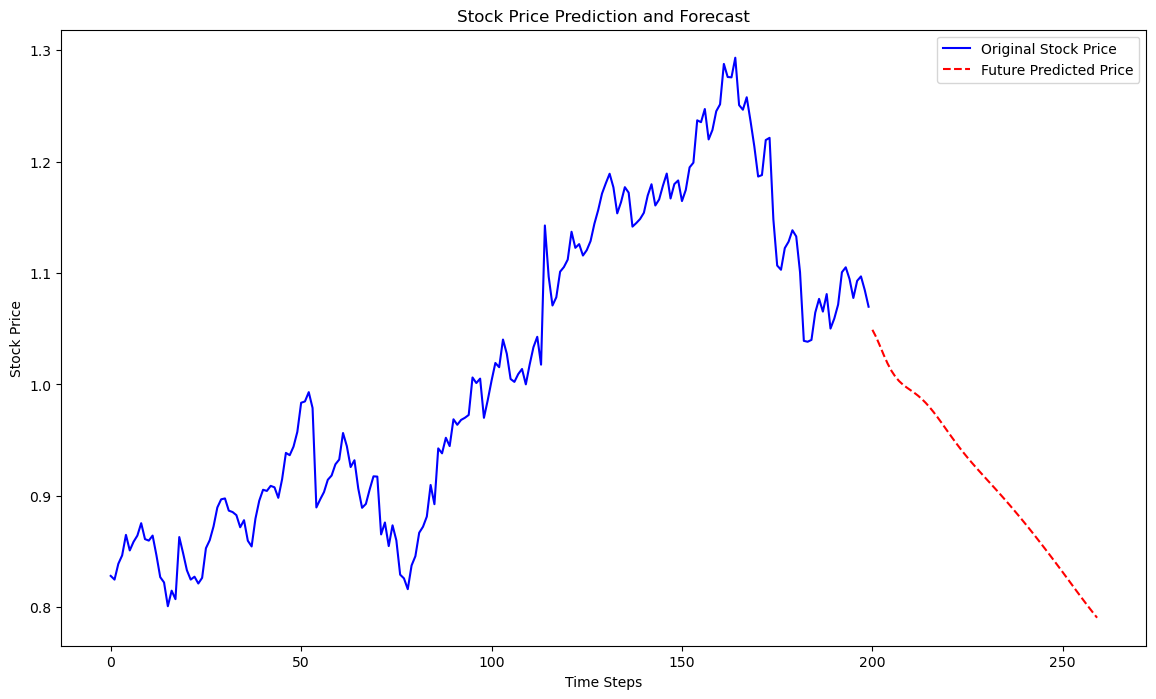

In [52]:
plt.figure(figsize=(14, 8))

plt.plot(combined_actual_predicted[-200:], color='blue', label='Original Stock Price')

#plt.plot(range(50, 50 + len(combined_predictions)), combined_predictions, color='orange', linestyle='--', label='Predicted Stock Price')

plt.plot(range(len(combined_actual_predicted[-200:]), len(combined_actual_predicted[-200:]) + len(future_predictions)), future_predictions, color='red', linestyle='--', label='Future Predicted Price')

plt.title('Stock Price Prediction and Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [53]:
combined_actual_future = np.concatenate((combined_actual_predicted, future_predictions))

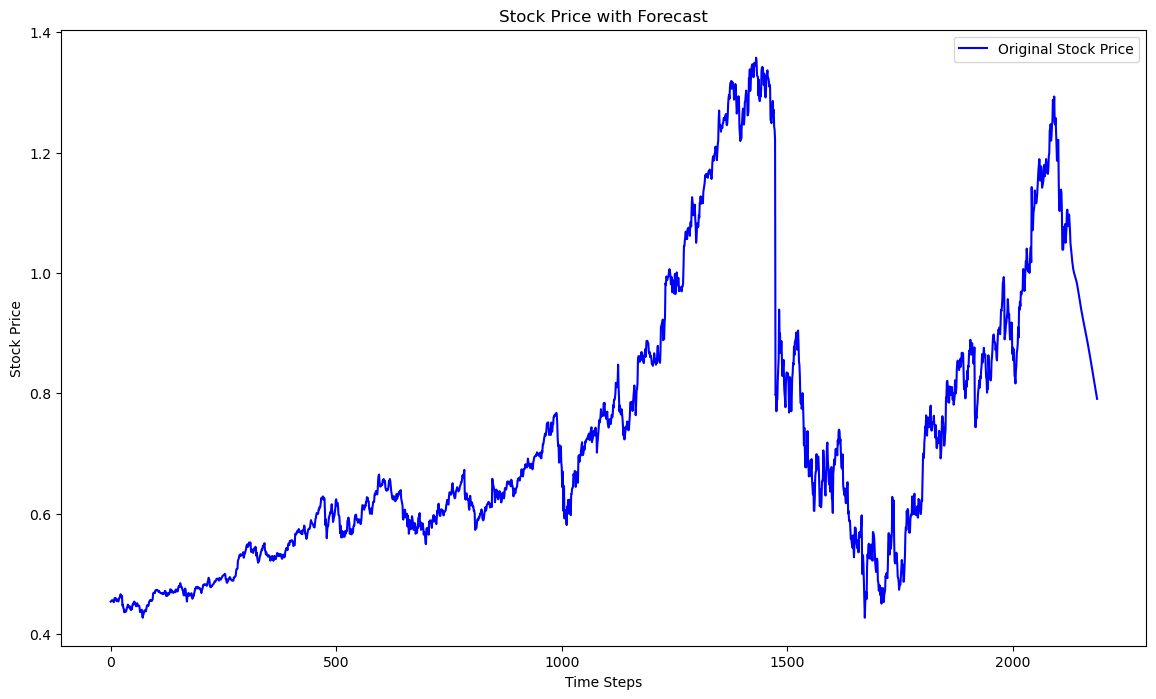

In [54]:
plt.figure(figsize=(14, 8))

plt.plot(combined_actual_future, color='blue', label='Original Stock Price')
plt.title('Stock Price with Forecast')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

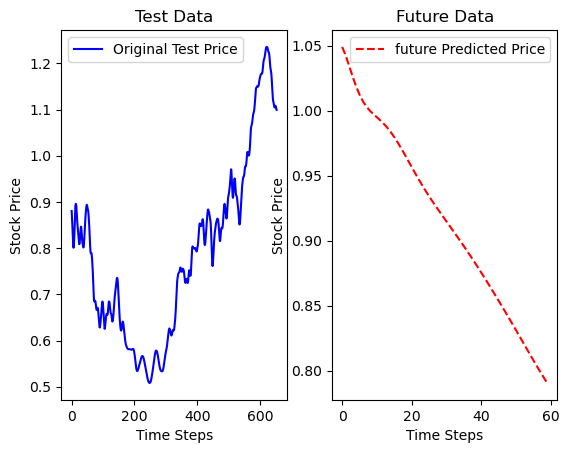

In [55]:
plt.subplot(1, 2, 1)
plt.plot(test_predict, color='blue', label='Original Test Price')
plt.title('Test Data')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(future_predictions, color='red', linestyle='--', label='future Predicted Price')
plt.title('Future Data')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()

In [56]:
future_predictions

array([[1.0490198 ],
       [1.0424315 ],
       [1.0344751 ],
       [1.0262846 ],
       [1.018716  ],
       [1.012254  ],
       [1.007075  ],
       [1.0030482 ],
       [0.99988467],
       [0.99726915],
       [0.99489766],
       [0.9925017 ],
       [0.9898683 ],
       [0.9868663 ],
       [0.9834621 ],
       [0.97964585],
       [0.97547466],
       [0.971008  ],
       [0.9663187 ],
       [0.9615181 ],
       [0.95670134],
       [0.9519439 ],
       [0.9472982 ],
       [0.94279474],
       [0.93844473],
       [0.93425786],
       [0.930216  ],
       [0.9262888 ],
       [0.92244345],
       [0.9186525 ],
       [0.91489255],
       [0.911142  ],
       [0.9073809 ],
       [0.9035958 ],
       [0.8997651 ],
       [0.8958827 ],
       [0.8919432 ],
       [0.8879462 ],
       [0.88389486],
       [0.8797855 ],
       [0.8756236 ],
       [0.87140423],
       [0.86712414],
       [0.8627889 ],
       [0.85841066],
       [0.8539958 ],
       [0.8495467 ],
       [0.845